## Clustering methods - comprehensive study
[필사 원본 링크](https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study)

Clustering is one of the most frequently used forms of unsupervised learning. 
It automatically discover natural grouping in data.

Clustering is especially useful for exploring data you know nothing about. 
You might find connections you never would have thought of. 
Clustering can also be useful as a type of feature engineering, where existing and new examples can be mapped and labeled as belonging to one of the identified clusters in the data.

Some typical real world applications of clustering include fraud detection, categorizing books in a library or customer segmentation in marketing.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

[clustering-exercises data 링크](https://www.kaggle.com/datasets/joonasyoon/clustering-exercises)

In [7]:
# clustering-exercises data
blob_df = pd.read_csv("../data/e-commerce/blob.csv")
dart_df = pd.read_csv("../data/e-commerce/dart.csv")
outliers_df = pd.read_csv("../data/e-commerce/outliers.csv")
spiral2_df = pd.read_csv("../data/e-commerce/spiral2.csv")
basic2_df = pd.read_csv("../data/e-commerce/basic2.csv")
boxes3_df = pd.read_csv("../data/e-commerce/boxes3.csv")

# 이커머스 데이터
raw_df = pd.read_csv("../data/e-commerce/data.csv", encoding= 'unicode_escape')

In [8]:
display(blob_df.head())
display(raw_df.head())

,x,y,color
0,199.115034,72.641121,1
1,196.880523,247.744708,2
2,88.426271,233.962425,2
3,118.578789,264.044188,2
4,249.572490,260.896521,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## clustering-exercises data 시각화

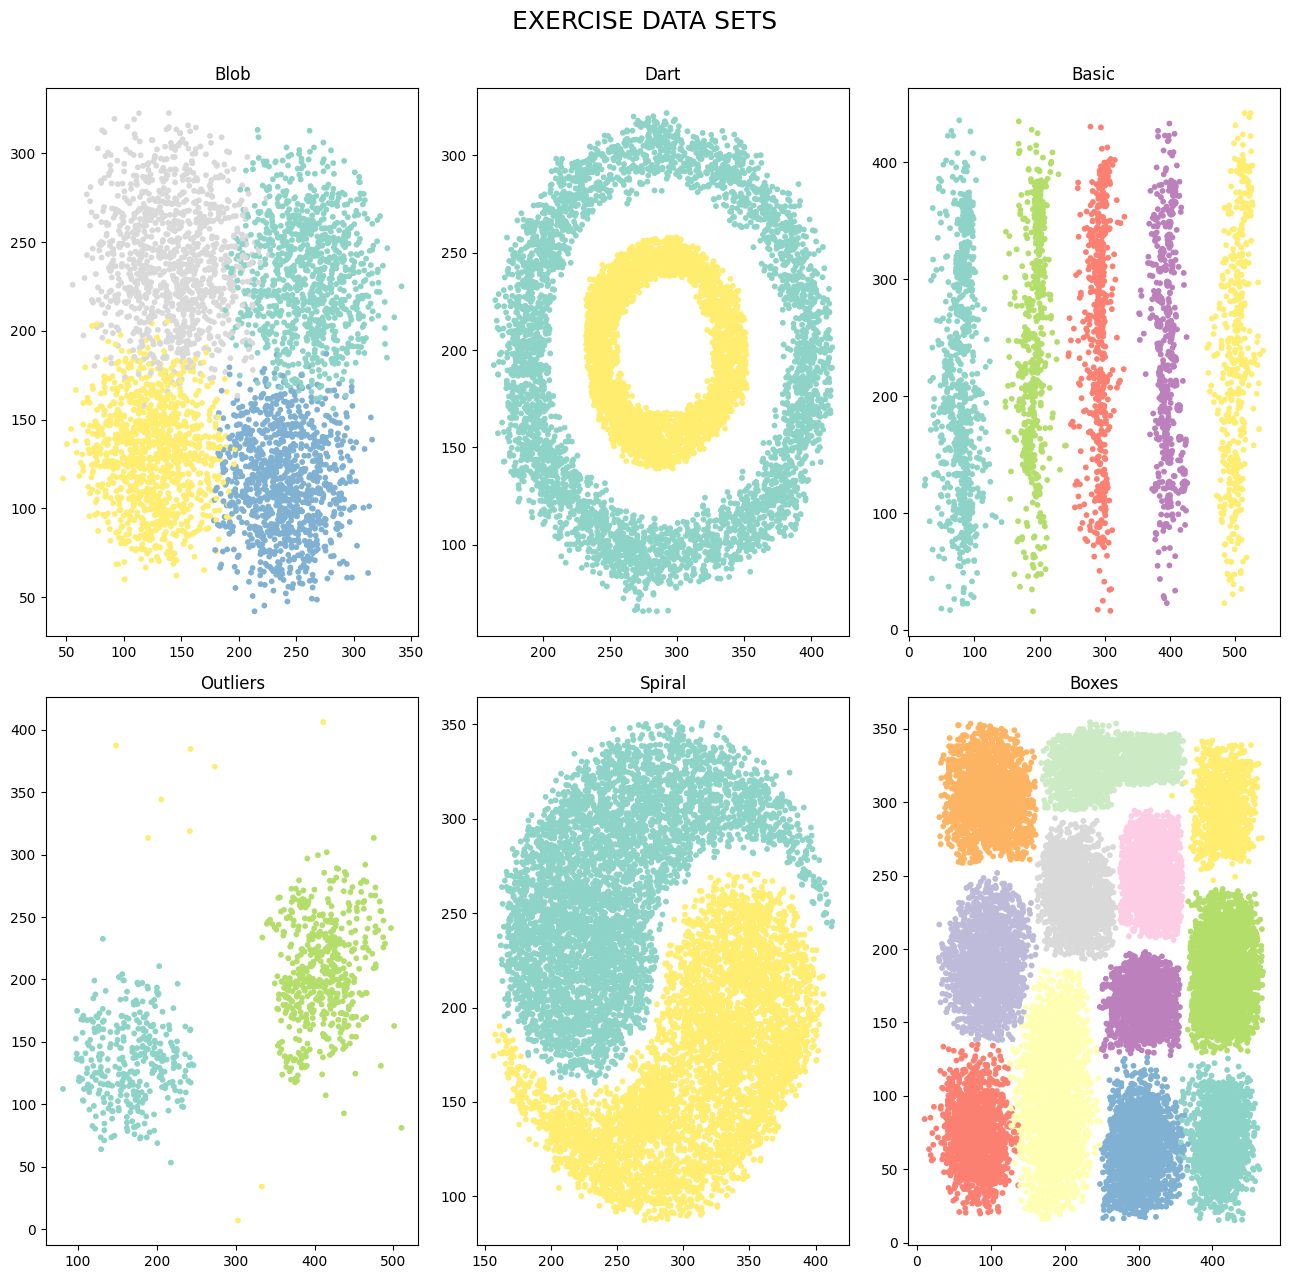

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(13,13))
fig.suptitle('EXERCISE DATA SETS\n', size = 18)

# s= scatter 점 사이즈
axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Blob");

axes[0,1].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[0,1].set_title("Dart");

axes[0,2].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[0,2].set_title("Basic");

axes[1,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Outliers");

axes[1,1].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[1,1].set_title("Spiral");

axes[1,2].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[1,2].set_title("Boxes");

plt.tight_layout()

## Feature engineering

In [21]:
print(raw_df.shape)
raw_df.head()

(541909, 4)


,InvoiceNo,Quantity,UnitPrice,CustomerID
0,536365,6,2.55,17850.0
1,536365,6,3.39,17850.0
2,536365,8,2.75,17850.0
3,536365,6,3.39,17850.0
4,536365,6,3.39,17850.0


In [17]:
raw_df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


### column 제거

In [19]:
# dropping columns
# 남은 column들을 보아하니 고객 분류를 위해 제품 가격, 수량, 주문 번호, 고객 번호만 남긴 것으로 추정
raw_df.drop(['StockCode', 'InvoiceDate','Description','Country'], axis=1, inplace=True)
raw_df.head()

,InvoiceNo,Quantity,UnitPrice,CustomerID
0,536365,6,2.55,17850.0
1,536365,6,3.39,17850.0
2,536365,8,2.75,17850.0
3,536365,6,3.39,17850.0
4,536365,6,3.39,17850.0


In [32]:
# 구매 수량과 제품 가격에 음수가 있는 것을 확인
# 환불을 의미
# 환불은 이커머스에서 중요한 요소이나 구매 데이터만 한정하여 사용
print(raw_df["Quantity"].min())
print(raw_df["UnitPrice"].min())

-80995
-11062.06


In [33]:
df = raw_df.loc[raw_df["Quantity"] > 0]
df = df.loc[df["UnitPrice"] > 0]

In [34]:
print(df["Quantity"].min())
print(df["UnitPrice"].min())

1
0.001


### 파생변수 : Total

In [35]:
# 주문 가격 = 제품 수량 * 제품 가격
df["Total"] = df["Quantity"] * df["UnitPrice"]
df.head(2)

,InvoiceNo,Quantity,UnitPrice,CustomerID,Total
0,536365,6,2.55,17850.0,15.30
1,536365,6,3.39,17850.0,20.34


In [36]:
# 수량, 가격 col 삭제
df.drop(["Quantity", "UnitPrice"], axis=1, inplace=True)

In [37]:
print("결측치 제거 전")
print(df.isnull().sum())
df.dropna(axis=0, inplace=True)
print("-" * 20)
print("결측치 제거 전")
print(df.isnull().sum())

결측치 제거 전
InvoiceNo          0
CustomerID    132220
Total              0
dtype: int64
--------------------
결측치 제거 전
InvoiceNo     0
CustomerID    0
Total         0
dtype: int64


### 파생변수
* Frequency : total number of transactions
* Amount : total amount of transactions

In [41]:
# Amount
# 고객 아이디 기준 주문 금액 합계
Amount = df.groupby("CustomerID")["Total"].sum()
Amount = Amount.reset_index()
Amount.columns=['CustomerID','Amount']
Amount.head()

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [42]:
# Frequency
# 고객 아이디 기준 주문 번호 개수
Frequency = df.groupby('CustomerID')['InvoiceNo'].count()
Frequency = Frequency.reset_index()
Frequency.columns = ['CustomerID','Frequency']
Frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [46]:
# merge both df
# 고객 아이디 기준 두 df inner merge
df1 = pd.merge(Amount, Frequency, on='CustomerID', how='inner')
df1.head()

,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [47]:
# 고객 아이디 column 제거
df1.drop(['CustomerID'], axis=1, inplace=True)
df1.head()

,Amount,Frequency
0,77183.60,1
1,4310.00,182
2,1797.24,31
3,1757.55,73
4,334.40,17


### 이상치

In [48]:
df1.describe(include='all')

,Amount,Frequency
count,4338.000000,4338.000000
mean,2054.266460,91.720609
std,8989.230441,228.785094
min,3.750000,1.000000
25%,307.415000,17.000000
50%,674.485000,41.000000
75%,1661.740000,100.000000
max,280206.020000,7847.000000


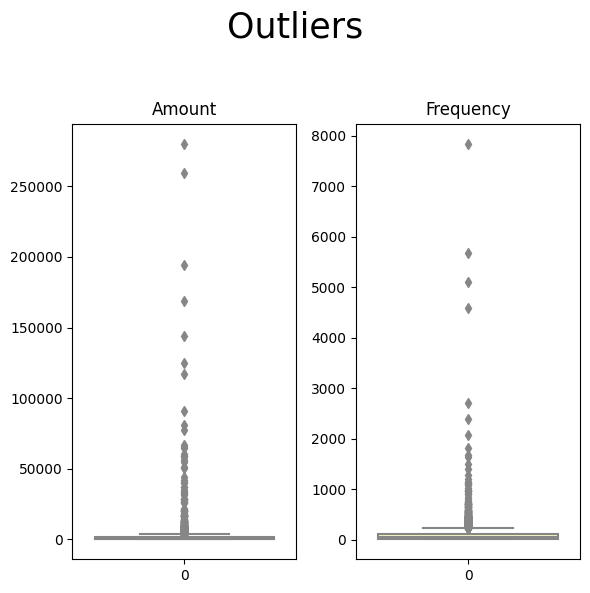

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=df1['Amount'], palette='Spectral').set_title("Amount")
sns.boxplot(ax=axes[1], data=df1['Frequency'], palette='Spectral').set_title("Frequency")

# tight_layout
# 자동으로 명시된 여백(padding)에 관련된 subplot 파라미터를 조정
# 모든 키워드 인자는 선택적으로 입력 가능
# 입력 없이 사용할 경우 기본값을 이용하여 자동으로 레이아웃 설정
plt.tight_layout()

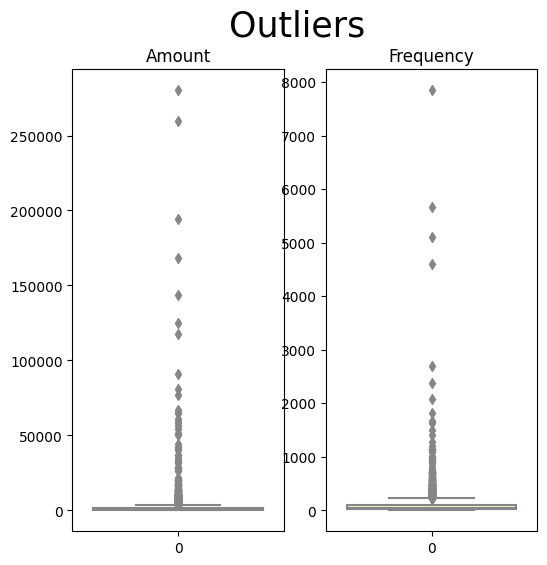

In [50]:
# plt.show()를 이용하여 같은 시각화 코드 출력
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=df1['Amount'], palette='Spectral').set_title("Amount")
sns.boxplot(ax=axes[1], data=df1['Frequency'], palette='Spectral').set_title("Frequency")

plt.show()

Outlier detection model selection
* distribution is not normal
* distribution is highly skewed
* we have huge outliers

In [51]:
from sklearn.ensemble import IsolationForest

df2 = df1.copy()

In [ ]:
model = IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(df2)